
###Linear Regression with Regularization

Predict the bike-sharing counts per hour based on the features including weather, day, time, humidity, wind speed, season e.t.c.

### Dataset

The dataset chosen for this mini-project is [Bike Sharing Dataset](https://archive.ics.uci.edu/ml/datasets/bike+sharing+dataset).  This dataset contains the hourly and daily count of rental bikes between the years 2011 and 2012 in the capital bike share system with the corresponding weather and seasonal information. This dataset consists of 17389 instances of each 16 features. 

Bike sharing systems are a new generation of traditional bike rentals where the whole process from membership, rental and return has become automatic. Through these systems, the user can easily rent a bike from a particular position and return to another position. Currently, there are about over 500 bike-sharing programs around the world which is composed of over 500 thousand bicycles. Today, there exists great interest in these systems due to their important role in traffic, environmental and health issues.

Apart from interesting real world applications of bike sharing systems, the characteristics of data being generated by these systems make them attractive for the research. As opposed to other transport services such as bus or subway, the duration of travel, departure and arrival position are explicitly recorded in these systems. This feature turns bike sharing system into a virtual sensor network that can be used for sensing mobility in the city. Hence, it is expected that the most important events in the city could be detected via monitoring these data.

<img src="https://s26551.pcdn.co/wp-content/uploads/2012/02/resize-va-sq-bikeshare.jpg" alt="drawing" width="400"/>

### Data Fields

* dteday - hourly date
* season - 1 = spring, 2 = summer, 3 = fall, 4 = winter
* hr - hour
* holiday - whether the day is considered a holiday
* workingday - whether the day is neither a weekend nor holiday
* weathersit -<br>
    1 - Clear, Few clouds, Partly cloudy, Partly cloudy <br>
    2 - Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist<br>
    3 - Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds<br>
    4 - Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog<br>   
* temp - temperature in Celsius
* atemp - "feels like" temperature in Celsius
* humidity - relative humidity
* windspeed - wind speed
* casual - number of non-registered user rentals initiated
* registered - number of registered user rentals initiated
* cnt - number of total rentals

## Information

**Regularization:** It is a form of regression that shrinks the coefficient estimates towards zero. In other words, this technique discourages learning a more complex or flexible model, to avoid the risk of overfitting. A simple relation for linear regression looks like this.

$Y ≈ β_0 + β_1 X_1 + β_2 X_2 + …+ β_p X_p$

 Here $Y$ represents the learned relation and $β$ represents the coefficient estimates for different variables or predictors(X).
 
 If there is noise in the training data, then the estimated coefficients won’t generalize well to the future data. This is where regularization comes in and shrinks or regularizes these learned estimates towards zero.
 
Below are the Regularization techniques:
 
 * Ridge Regression
 * Lasso Regression
 * Elasticnet Regression

In [ ]:
#@title Download the dataset
!wget -qq https://cdn.iisc.talentsprint.com/CDS/MiniProjects/Bike_Sharing_Dataset.zip
!unzip Bike_Sharing_Dataset.zip

Archive:  Bike_Sharing_Dataset.zip
  inflating: Readme.txt              
  inflating: day.csv                 
  inflating: hour.csv                


#### Importing Necessary Packages

In [ ]:
# Loading the Required Packages
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import r2_score


### Data Loading

In [ ]:
# Read the hour.csv file
# YOUR CODE HERE
df = pd.read_csv("/content/hour.csv")

print the first five rows of dataset

In [ ]:
# YOUR CODE HERE
df.head(15)

,season,yr,mnth,holiday,weekday,weathersit,temp,hum,windspeed,cnt,peak
0,1,0,1,0,0,1,0.224490,0.81,0.000000,16,0
1,1,0,1,0,0,1,0.204082,0.80,0.000000,40,0
2,1,0,1,0,0,1,0.204082,0.80,0.000000,32,0
3,1,0,1,0,0,1,0.224490,0.75,0.000000,13,0
4,1,0,1,0,0,1,0.224490,0.75,0.000000,1,0
5,1,0,1,0,0,2,0.224490,0.75,0.105325,1,0
6,1,0,1,0,0,1,0.204082,0.80,0.000000,2,0
7,1,0,1,0,0,1,0.183673,0.86,0.000000,3,0
8,1,0,1,0,0,1,0.224490,0.75,0.000000,8,0
9,1,0,1,0,0,1,0.306122,0.76,0.000000,14,0


print the datatypes of the columns

In [ ]:
# YOUR CODE HERE
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


### Task flow with respect to feature processing and model training

* Explore and analyze the data

* Identify continuous features and categorical features

* Apply scaling on continuous features and one-hot encoding on categorical features

* Separate the features, targets and split the data into train and test

* Find the coefficients of the features using normal equation and find the cost (error)

* Apply batch gradient descent technique and find the best coefficients

* Apply SGD Regressor using sklearn

* Apply linear regression using sklearn

* Apply Lasso, Ridge, Elasticnet Regression

### EDA &  Visualization ( 2 points)

#### Visualize the hour (hr) column with an appropriate plot and find the busy hours of bike sharing

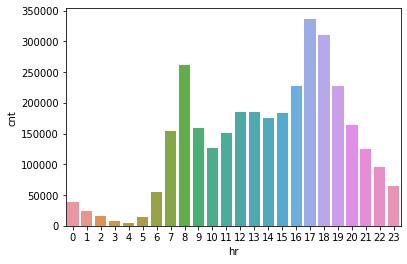

In [ ]:
# YOUR CODE HERE
hourly_count = df.groupby("hr")["cnt"].sum().reset_index()
sns.barplot(x = 'hr', y = 'cnt', data = hourly_count)

[Text(0.5, 1.0, 'Count of bikes during weekdays and weekends')]

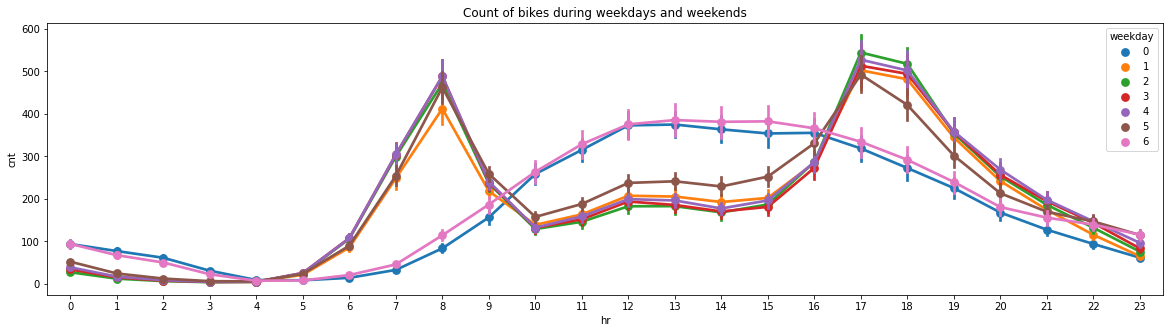

In [ ]:
fig, ax = plt.subplots(figsize=(20,5))
sns.pointplot(data = df, x ='hr', y ='cnt', hue='weekday', ax=ax)
ax.set(title='Count of bikes during weekdays and weekends')

In [ ]:
df['peak'] = df[['hr', 'weekday']].apply(lambda df: 1 if (((df['weekday'] == 1 or df['weekday'] == 2  
or df['weekday'] == 3 or df['weekday'] == 4  or df['weekday'] == 5) 
and (7 <= df['hr'] <= 9 or 16 <= df['hr'] <= 20)) or 
((df['weekday'] == 0 or df['weekday'] == 6) and 10 <= df['hr'] <= 19)) else 0, axis = 1)

df.drop('hr', axis=1, inplace=True)

In [ ]:
df['weekday'] = df['weekday'].apply(lambda x: 1 if (1 <= x <= 5 ) else 0)

**The feature 'hr' or can say rental hours, clear shows peak office commute hours and afternoon rides are very popular bike time.**

#### Visualize the distribution of count, casual and registered variables

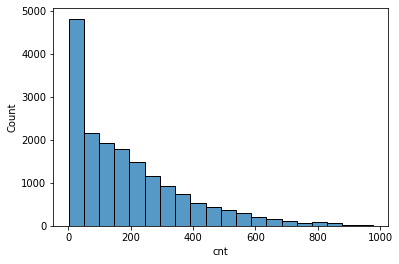

In [ ]:
# YOUR CODE HERE for distribuiton of count variable
sns.histplot(x='cnt', data = df, bins = 20)

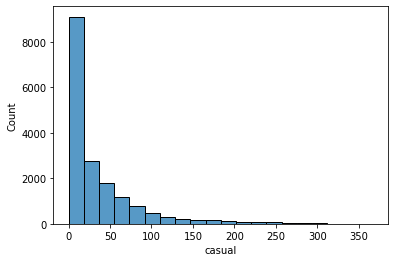

In [ ]:
# YOUR CODE HERE for distribuiton of casual variable
sns.histplot(x='casual', data = df, bins = 20)

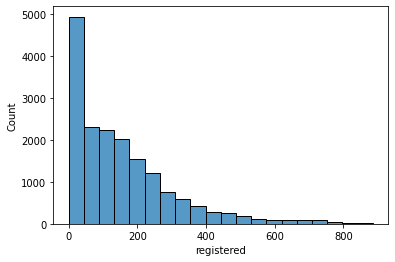

In [ ]:
# YOUR CODE HERE for distribuiton of registered variable
sns.histplot(x='registered', data = df, bins = 20)

In [ ]:
df['cnt'] = df['cnt'].apply(lambda x : x if x < 500 else 500)
#df = df[df['cnt'] <= 500]

**Since our data is positively skewed here, it means that it has a higher number of data points having low values of casual, registered and count variable.Also, skewness tells us about the direction of outliers. You can see that our distribution is positively skewed and most of the outliers are present on the right side of the distribution.**

#### Describe the relation of weekday, holiday and working day

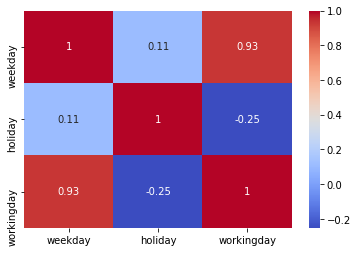

In [ ]:
# YOUR CODE HERE
cor_df = df[[ 'weekday', 'holiday', 'workingday']]
correlation = cor_df.corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm',
            xticklabels=correlation.columns.values,
            yticklabels=correlation.columns.values)

#### Visualize the month wise count of both casual and registered for the year 2011 and 2012 separately.

Hint: Stacked barchart

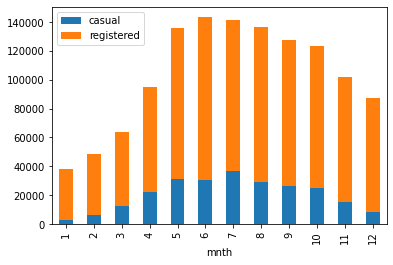

In [ ]:
# stacked bar chart for year 2011
# YOUR CODE HERE
sum2011 = df[df['yr'] ==0].groupby('mnth')[['casual', 'registered']].sum()
sum2011[['casual', 'registered']].plot(kind = 'bar', stacked = True)

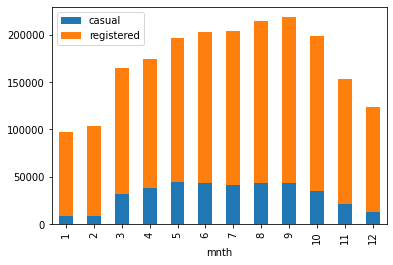

In [ ]:
# stacked bar chart for year 2012
# YOUR CODE HERE
sum2012 = df[df['yr'] ==1].groupby('mnth')[['casual', 'registered']].sum()
sum2012[['casual', 'registered']].plot(kind = 'bar', stacked = True)

#### Analyze the correlation between features with heatmap

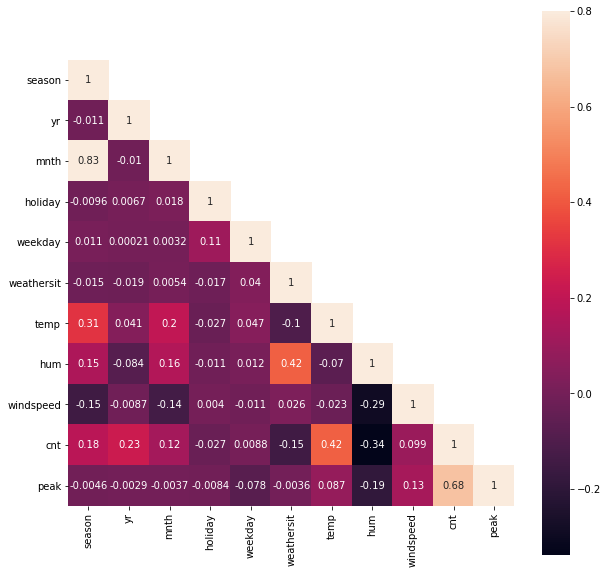

In [ ]:
# YOUR CODE HERE
CorrMat = df.corr()
mask=np.array(CorrMat)
mask[np.tril_indices_from(mask)]=False
#Heat map to plot the Correlation matrix
fig,ax=plt.subplots(figsize=(10,10))
sns.heatmap(CorrMat,mask=mask,
          vmax=0.8,square=True,annot=True,ax=ax)

#### Visualize the box plot of casual and registered variables to check the outliers

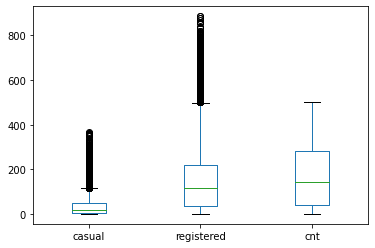

In [ ]:
# YOUR CODE HERE
df[['casual', 'registered', 'cnt']].plot(kind = 'box')

### Pre-processing and Data Engineering (1 point)

#### Drop unwanted columns

1. there are dates integers\floats
 also some redundant datas like *dteday* which have alredy been categorized throught 'session', 'yr', 'mnth', 'hr'. 
2. temp and atemp are highly correlated, So having both of them in regression model lead to multicollinearity issue. Therefore, we will drop one of the variable.
3. Casual and registered contain direct information about the bike sharing count which is to predict (data leakage). Therefore they are not considered in the feature set.

In [ ]:
# YOUR CODE HERE
# atemp has very high correlation with temp
df.drop(columns=['instant','dteday','atemp','casual','registered', 'workingday'], axis=1, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      17379 non-null  int64  
 1   yr          17379 non-null  int64  
 2   mnth        17379 non-null  int64  
 3   holiday     17379 non-null  int64  
 4   weekday     17379 non-null  int64  
 5   weathersit  17379 non-null  int64  
 6   temp        17379 non-null  float64
 7   hum         17379 non-null  float64
 8   windspeed   17379 non-null  float64
 9   cnt         17379 non-null  int64  
 10  peak        17379 non-null  int64  
dtypes: float64(3), int64(8)
memory usage: 1.5 MB


#### Identify categorical and continuous variables


In [ ]:
# YOUR CODE HERE
print(df.nunique())

season          4
yr              2
mnth           12
holiday         2
weekday         2
weathersit      4
temp           50
hum            89
windspeed      30
cnt           500
peak            2
dtype: int64


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      17379 non-null  int64  
 1   yr          17379 non-null  int64  
 2   mnth        17379 non-null  int64  
 3   holiday     17379 non-null  int64  
 4   weekday     17379 non-null  int64  
 5   weathersit  17379 non-null  int64  
 6   temp        17379 non-null  float64
 7   hum         17379 non-null  float64
 8   windspeed   17379 non-null  float64
 9   cnt         17379 non-null  int64  
 10  peak        17379 non-null  int64  
dtypes: float64(3), int64(8)
memory usage: 1.5 MB


In [ ]:
categorical = ['season', 'yr',	'mnth',	'holiday',	'weekday', 'weathersit', 'peak']
continuos = ['temp',	'hum',	'windspeed']

#### Feature scaling

Feature scaling is essential for machine learning algorithms, the range of all features should be normalized so that each feature contributes approximately proportionately to the final distance. Apply scaling on the continuous variables on the given data.

Hint: `MinMaxScaler` or `StandardScaler`



In [ ]:
# YOUR CODE HERE
scaler = MinMaxScaler()

df[continuos] = scaler.fit_transform(df[continuos])
df.head()

,season,yr,mnth,holiday,weekday,weathersit,temp,hum,windspeed,cnt,peak
0,1,0,1,0,0,1,0.224490,0.81,0.0,16,0
1,1,0,1,0,0,1,0.204082,0.80,0.0,40,0
2,1,0,1,0,0,1,0.204082,0.80,0.0,32,0
3,1,0,1,0,0,1,0.224490,0.75,0.0,13,0
4,1,0,1,0,0,1,0.224490,0.75,0.0,1,0


#### Apply one-hot encode on the categorical data

One-hot encoding is applied on the categorical variables, which should not have a different weight or order attached to them, it is presumed that all categorical variables have equivalent "values". This means that you cannot simply order them from zero to the number of categories as this would imply that the earlier categories have less "value" than later categories.

Hint: `sklearn.preprocessing.OneHotEncoder`

In [ ]:
# YOUR CODE HERE
onehotencoder = OneHotEncoder(categories = 'auto', drop = 'first')

transformed_data = onehotencoder.fit_transform(df[categorical]).toarray()
labels = onehotencoder.get_feature_names(categorical)

print(labels)

['season_2' 'season_3' 'season_4' 'yr_1' 'mnth_2' 'mnth_3' 'mnth_4'
 'mnth_5' 'mnth_6' 'mnth_7' 'mnth_8' 'mnth_9' 'mnth_10' 'mnth_11'
 'mnth_12' 'holiday_1' 'weekday_1' 'weathersit_2' 'weathersit_3'
 'weathersit_4' 'peak_1']


#### Specify features and targets after applying scaling and one-hot encoding

In [ ]:
# YOUR CODE HERE
encoder_df = pd.DataFrame(transformed_data, columns = labels, index = df.index)
df1 = pd.concat([encoder_df, df[continuos]], axis=1)
df1.columns

Index(['season_2', 'season_3', 'season_4', 'yr_1', 'mnth_2', 'mnth_3',
       'mnth_4', 'mnth_5', 'mnth_6', 'mnth_7', 'mnth_8', 'mnth_9', 'mnth_10',
       'mnth_11', 'mnth_12', 'holiday_1', 'weekday_1', 'weathersit_2',
       'weathersit_3', 'weathersit_4', 'peak_1', 'temp', 'hum', 'windspeed'],
      dtype='object')

<pre>
**Features** = ['season_2', 'season_3', 'season_4', 'yr_1', 'mnth_2', 'mnth_3',
       'mnth_4', 'mnth_5', 'mnth_6', 'mnth_7', 'mnth_8', 'mnth_9', 'mnth_10',
       'mnth_11', 'mnth_12', 'holiday_1', 'weekday_1', 'weekday_2',
       'weekday_3', 'weekday_4', 'weekday_5', 'weekday_6', 'workingday_1',
       'weathersit_2', 'weathersit_3', 'weathersit_4', 'peak_1', 'temp', 'hum',
       'windspeed']

**Target** = ['cnt']
</pre>

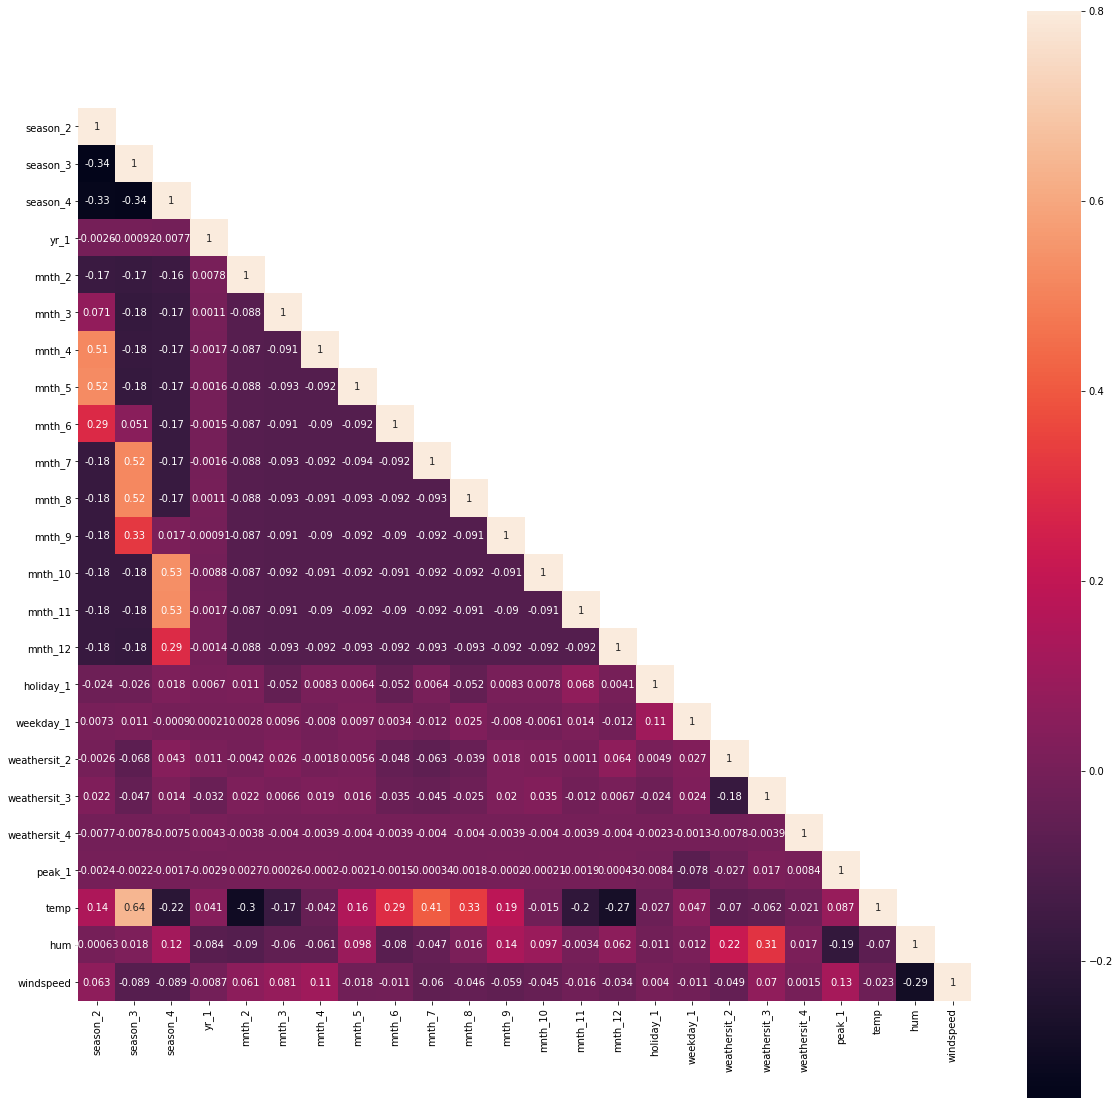

In [ ]:
# YOUR CODE HERE
CorrMat = df1.corr()
mask=np.array(CorrMat)
mask[np.tril_indices_from(mask)]=False
#Heat map to plot the Correlation matrix
fig,ax=plt.subplots(figsize=(20,20))
sns.heatmap(CorrMat,mask=mask,
          vmax=0.8,square=True,annot=True,ax=ax)

### Implement the linear regression by finding the coefficients using below approaches (3 points)

* Find the coefficients using normal equation

* Implement batch gradient descent

* SGD Regressor from sklearn

#### Select the features and target and split the dataset

As there are 3 target variables, choose the count (`cnt`) variable.

In [ ]:
# YOUR CODE HERE
X = df1.values
y = df['cnt'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

print('Shape of the Train data is:' , X_train.shape)
print('Shape of the Test data is:' , X_test.shape)

Shape of the Train data is: (13903, 24)
Shape of the Test data is: (3476, 24)


#### Implementation using Normal Equation

$\theta = (X^T X)^{-1} . (X^T Y)$

$θ$ is the hypothesis parameter that defines the coefficients

$X$ is the input feature value of each instance

$Y$ is Output value of each instance

To solve the normal equation compute least-squares solution by using `scipy.linalg`

Hint: [scipy.linalg.lstsq](https://docs.scipy.org/doc/scipy/reference/generated/scipy.linalg.lstsq.html)

In [ ]:
# YOUR CODE HERE
from scipy.linalg import lstsq

M = np.hstack((np.ones((X.shape[0], 1), dtype=X.dtype), X))

p, res, rnk, s = lstsq(M, y)

#print(f"p:{p}, res:{res}, rnk:{rnk}, s:{s}")
print(f"residual: {res}")

r2 = 1 - res / sum((y - y.mean())**2)
print(f"r2-squared: {r2}") 

residual: 124425189.8987545
r2-squared: 0.7058028239533688


**The least square method is the process of finding the best-fitting curve or line of best fit for a set of data points by reducing the sum of the squares of the offsets (residual part) of the points from the curve**

#### Implementing Linear regression using batch gradient descent

Initialize the random coefficients and optimize the coefficients in the iterative process by calculating cost and finding the gradient.

Hint: [gradient descent](https://medium.com/@lope.ai/multivariate-linear-regression-from-scratch-in-python-5c4f219be6a)

In [ ]:
# YOUR CODE HERE

def cost_function(X, Y, B):
  m = len(Y)
  J = np.sum((X.dot(B) - Y) ** 2)/(2 * m)
  return J
 
def batch_gradient_descent(X, Y, B, alpha, iterations):
  cost_history = [0] * iterations
  m = len(Y)
  
  for iteration in range(iterations):
    # Hypothesis Values
    h = X.dot(B)
    # Difference b/w Hypothesis and Actual Y
    loss = h - Y
    # Gradient Calculation
    gradient = X.T.dot(loss) / m
    # Changing Values of B using Gradient
    B = B - alpha * gradient
    # New Cost Value
    cost = cost_function(X, Y, B)
    cost_history[iteration] = cost

  return B, alpha, cost_history


def predict(x,w, alpha):
  y_pred=[]
  for i in range(len(x)):
    y = np.asscalar(np.dot(w,x[i])+ alpha)
    y_pred.append(y)

  return np.array(y_pred)


def r2(y_,y):
  sst = np.sum((y-y.mean())**2)
  ssr = np.sum((y_-y)**2)
  r2 = 1-(ssr/sst)
  return r2


#Initial Coefficients
B = np.zeros(X_train.shape[1] + 1)
M = np.hstack((np.ones((X_train.shape[0], 1), dtype=X.dtype), X_train))

alphas = [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3, 0.5]

iterations = 10000
for alpha in alphas:
  newB, alpha, cost_history = batch_gradient_descent(M, y_train, B, alpha, iterations)

  M_test = np.hstack((np.ones((X_test.shape[0], 1), dtype=X.dtype), X_test))
  y_predict = predict(M_test, newB, alpha)


  #----------------
  r2_val = r2(y_predict,y_test)

  print(f"r2_val: {r2_val}, alpha: {alpha}")
  #print(alpha)
  #print(newB)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:31: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead


r2_val: 0.3104409076228305, alpha: 0.0001
r2_val: 0.6554625258863972, alpha: 0.001
r2_val: 0.7025448699060658, alpha: 0.01
r2_val: 0.7077940070408443, alpha: 0.1
r2_val: 0.7078174956312995, alpha: 0.2
r2_val: 0.7078096320515657, alpha: 0.3
r2_val: 0.7078033120272423, alpha: 0.5


**Gradient Descent is an optimization algorithm for finding a local minimum of a differentiable function. Gradient descent is simply used to find the values of a function's parameters (coefficients) that minimize a cost function as far as possible.**

#### SGD Regressor

Scikit-learn API provides the SGDRegressor class to implement SGD method for regression problems. The SGD regressor applies regularized linear model with SGD learning to build an estimator. A regularizer is a penalty (L1, L2, or Elastic Net) added to the loss function to shrink the model parameters.

* Import SGDRegressor from sklearn and fit the data

* Predict the test data and find the error

Hint: [SGDRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDRegressor.html)

In [ ]:
# YOUR CODE HERE
from sklearn.linear_model import SGDRegressor

alphas = [0.00001, 0.0001, 0.001, 0.01, 0.1] 

for alpha in alphas:
  reg = SGDRegressor(alpha=alpha, max_iter = 10000)
  reg.fit(X_train, y_train)

  y_pred = reg.predict(X_test)

  r2 = r2_score(y_test, y_pred)

  print(f"R2 score : {r2} , alpha : {alpha}")

R2 score : 0.7070028262763424 , alpha : 1e-05
R2 score : 0.7069846401361264 , alpha : 0.0001
R2 score : 0.706797640247837 , alpha : 0.001
R2 score : 0.6979290065052921 , alpha : 0.01
R2 score : 0.5974658797826002 , alpha : 0.1


**SGD often converges much faster compared to GD but the error function is not as well minimized as in the case of GD. The close approximation we get in SGD for the parameter values are enough because they reach the optimal values and keep oscillating there.**

### Linear regression using sklearn (2 points)

Implement the linear regression model using sklearn

* Import Linear Regression and fit the train data

* Predict the test data and find the error

Hint: [LinearRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)

In [ ]:
# YOUR CODE HERE
from sklearn.linear_model import LinearRegression
import math

alphas = [0.00001, 0.0001, 0.001, 0.01, 0.1] 

for alpha in alphas:
  reg = LinearRegression()
  reg.fit(X_train, y_train)

  y_pred = reg.predict(X_test)
  r2 = r2_score(y_test, y_pred)

  rmse = mean_squared_error(y_test, y_pred)
  rmsqrt  = math.sqrt(rmse)

  print(f"R2 score : {r2}, alpha : {alpha}, rmsqrt : {rmsqrt}")

R2 score : 0.7078205701299631, alpha : 1e-05, rmsqrt : 84.6891828079588
R2 score : 0.7078205701299631, alpha : 0.0001, rmsqrt : 84.6891828079588
R2 score : 0.7078205701299631, alpha : 0.001, rmsqrt : 84.6891828079588
R2 score : 0.7078205701299631, alpha : 0.01, rmsqrt : 84.6891828079588
R2 score : 0.7078205701299631, alpha : 0.1, rmsqrt : 84.6891828079588


Linear regression assumes a linear relationship between the independent and dependent variable that uses Least square fitting

**From the implementation point of view, this is just plain Ordinary Least Squares (scipy.linalg.lstsq) **

#### Summarize the importance of features

Prediction is the weighted sum of the input values e.g. linear regression. Regularization, such as ridge regression and the elastic net, find a set of coefficients to use in the weighted sum to make a prediction. These coefficients can be used directly as a crude type of feature importance score. 
This assumes that the input variables have the same scale or have been scaled prior to fitting a model.

Use the coefficients obtained through the sklearn Linear Regression implementation and create a bar chart of the coefficients.

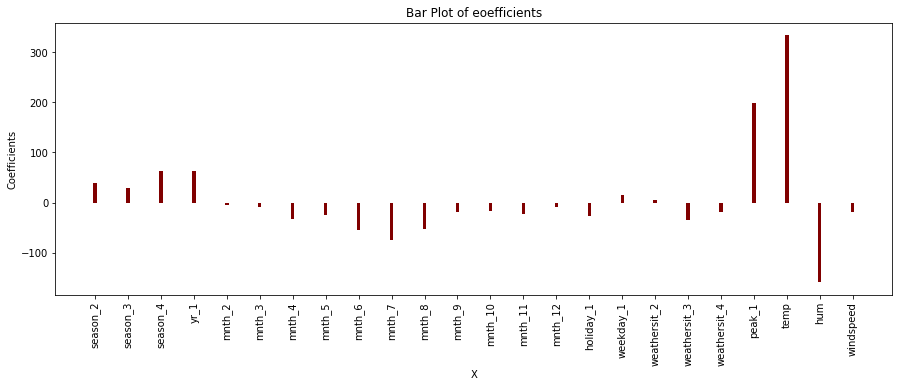

In [ ]:
# YOUR CODE HERE
# YOUR CODE HERE
fig = plt.figure(figsize = (15, 5))


# creating the bar plot
plt.bar(df1.columns, reg.coef_, color ='maroon', width = .1)
 
plt.xlabel("X")
plt.xticks(rotation=90)
plt.ylabel("Coefficients")
plt.title("Bar Plot of eoefficients")
plt.show()


From above plot we can infer that peak hours, temperature, season 4 is high positive correlation whereas humidity, month 6 and month 7 as high negative correlation and helps in predicitng the count of rental bikes ( target variable).

### Regularization methods

#### Apply Lasso regression

* Apply Lasso regression with different alpha values given below and find the best alpha that gives the least error.
* Calculate the metrics for the actual and predicted



In [ ]:
# setting up alpha
alphas = [0.0001, 0.001,0.01, 0.1, 1, 10, 100]

In [ ]:
# YOUR CODE HERE
from sklearn.linear_model import Lasso

#for alpha in alphas:
clf = Lasso(alpha=0.1)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
r2 = r2_score(y_test, y_pred)

print(f"r2 score: {r2}, Alpha: {alpha}")


r2 score: 0.7080179830261875, Alpha: 0.1


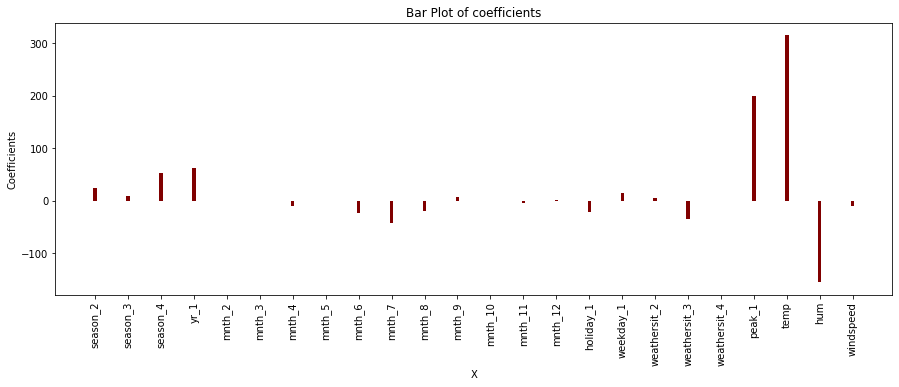

In [ ]:
# YOUR CODE HERE
# YOUR CODE HERE
fig = plt.figure(figsize = (15, 5))


# creating the bar plot
plt.bar(df1.columns, clf.coef_, color ='maroon', width = .1)
 
plt.xlabel("X")
plt.xticks(rotation=90)
plt.ylabel("Coefficients")
plt.title("Bar Plot of coefficients")
plt.show()

**Lasso regression is a type of linear regression that uses shrinkage to 0 for sparse selection**

#### Apply Ridge regression

* Apply Ridge regression with different alpha values given and find the best alpha that gives the least error.
* Calculate the metrics for the actual and predicted



In [ ]:
# YOUR CODE HERE
from sklearn.linear_model import Ridge

for alpha in alphas:
  clf = Ridge(alpha=alpha)
  clf.fit(X_train, y_train)

  y_pred = clf.predict(X_test)
  r2 = r2_score(y_test, y_pred)

  print(f"r2 score: {r2}, Alpha: {alpha}")

r2 score: 0.7078205719735406, Alpha: 0.0001
r2 score: 0.7078205885611727, Alpha: 0.001
r2 score: 0.707820753985734, Alpha: 0.01
r2 score: 0.7078223631532172, Alpha: 0.1
r2 score: 0.7078340166838315, Alpha: 1
r2 score: 0.7076372756147333, Alpha: 10
r2 score: 0.701131190260869, Alpha: 100


**This penalty shrinks the coefficients to a very large degree, essentially reducing to a model containing just the intercept. This over-shrinking makes the model more biased, resulting in a higher MSE.**

#### Apply Elasticnet regression

* Apply Elasticnet regression with different alpha values given and find the best alpha that gives the least error.
* Calculate the metrics for the actual and predicted


In [ ]:
# YOUR CODE HERE
from sklearn.linear_model import ElasticNet

for alpha in alphas:
  clf = ElasticNet(alpha=alpha)
  clf.fit(X_train, y_train)

  y_pred = clf.predict(X_test)
  r2 = r2_score(y_test, y_pred)

  print(f"r2 score: {r2}, Alpha: {alpha}")


r2 score: 0.7078312024308058, Alpha: 0.0001
r2 score: 0.7077490692747102, Alpha: 0.001
r2 score: 0.7035531756410489, Alpha: 0.01
r2 score: 0.652650012367086, Alpha: 0.1
r2 score: 0.3288276523084952, Alpha: 1
r2 score: 0.04306997071027041, Alpha: 10
r2 score: -0.00010179146171052089, Alpha: 100


**Elastic Net regression is a classification algorithm that overcomes the limitations of the lasso method which uses a penalty function in its L1 regularization.Elastic Net regression is a hybrid approach that blends both penalizations of the L2 and L1 regularization of lasso and ridge methods.Elastic Net and this will shrink some coefficients and set some to 0 for sparse selection.**

### Determine if there is a reduction in error if two target variables are considered

Consider (`Casual, Registered`) as target and find the error by implementing Linear Regression model from sklearn

### Report Analysis

* Describe your interpretation of the methods that are used to implement linear regression covered in this mini project.
* Comment on performance of the algorithms/methods used.
* Comment about the nature of the data and fitment of linear regression for this data.
* Can you perform a non linear curve fitting using linear regression? If yes, How?


1. Based on above analysis, Gradient descent and ElasticNet is doing better in terms of r-squred value.

2. Ridge is better than other models as its r-squared are not impacted with different values of alpha.  

3. Explained in chart where feature coeff is shown.

4. Yes, we can use Polynomial Regression which is a form of linear regression in which the relationship between the independent variable x and dependent variable y is modeled as an nth degree polynomial. Polynomial regression fits a nonlinear relationship between the value of x and the corresponding conditional mean of y, denoted E(y |x)